In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utils

from utils import local_data
from utils import window
from utils import Scale
from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))

In [3]:
df_station

identificationstation    height   latitude  longitude  \
city_name_correct                                                           
Belo Horizonte                        bhz   858.000 -19.868500 -43.954200   
Brasília                              bsa  1050.000 -15.764200 -47.869400   
Cachoeira Paulista                    cpa   580.000 -22.410000 -45.000000   
Campo Grande                           32       NaN -20.497000 -54.615000   
Cuiabá                                cub   278.000 -15.555200 -56.069800   
Dourados                              dou   756.120 -22.110000 -54.550000   
Fortaleza                              24       NaN  -3.742000 -38.539000   
Guaratinguetá                          33       NaN -22.789000 -45.220000   
Ilhéus                                ios     0.000 -14.470000 -39.100000   
Inconfidentes                          25       NaN -22.318000 -46.329000   
Macaé                                  11       NaN -22.823000 -41.785700   
Natal                                 nta     0.000  -5.836162 -35.121000   
Palmas                                  3       NaN -10.200000 -48.312000   
Pirassununga                           30       NaN -21.989000 -47.334000   
Porto Alegre                            4       NaN -30.071000 -51.119000   
Presidente Prudente                     6       NaN -22.120000 -51.407000   
Rio de Janeiro                         34       NaN -22.823000 -43.238000   
Salvador                               26       NaN -13.001000 -38.508000   
Santa Maria                           sta   110.100 -29.712591 -53.717206   
São José dos Campos                   sj2   593.440 -23.207000 -45.859000   
Tefé                                  tfe     0.057  -3.180000 -64.440000   

                    state                                      city  \
city_name_correct                                                     
Belo Horizonte         mg                            belo horizonte   
Brasília               df                                  brasilia   
Cachoeira Paulista     sp                        cachoeira paulista   
Campo Grande           ms                             campos grande   
Cuiabá                 mt                                    cuiaba   
Dourados               ms                                  dourados   
Fortaleza              ce                                 fortaleza   
Guaratinguetá          sp                            guaratinguestá   
Ilhéus                 ba                                    ilheus   
Inconfidentes          mg                             inconfidentes   
Macaé                  rj                                     macaé   
Natal                  rn                                     natal   
Palmas                 ro                                    palmas   
Pirassununga           sp  academia das forças aérias, pirassununga   
Porto Alegre           rs                              porto alegre   
Presidente Prudente    sp                       presidente prudente   
Rio de Janeiro         rj         rio de janeiro (aeroporto galeão)   
Salvador               ba                                  salvador   
Santa Maria            rs                               santa maria   
São José dos Campos    sp                 são josé dos campos(inpe)   
Tefé                   am                                      tefe   

                     city_heigh  city_latitude  city_longitude  mag_latitude  \
city_name_correct                                                              
Belo Horizonte            767.0      -19.81570        -43.9542    -17.046410   
Brasília                 1130.0      -15.78010        -47.9292    -11.650141   
Cachoeira Paulista        545.0      -22.67370        -44.9973    -18.841812   
Campo Grande              612.0      -20.44350        -54.6478    -13.358563   
Cuiabá                    180.0      -15.59890        -56.0949     -8.396444   
Dourados                  448.0      -22.22180        

In [4]:
for i in df_series_vtec.columns:
    # to vtec data
    value_min_vtec = df_series_vtec[i].min()
    value_max_vtec = df_series_vtec[i].max()
    
    print(i)
    print('Valor mínimo de vtec:', value_min_vtec)
    print('Valor máximo de vtec:', value_max_vtec)
    
    scale_vtec = Scale(value_min_vtec, value_max_vtec)
    df_series_vtec[i] = scale_vtec(df_series_vtec[i].values.ravel())

    value_min_s4 = df_series_s4[i].min()
    value_max_s4 = df_series_s4[i].max()
    
    print('Valor mínimo de s4:', value_min_s4)
    print('Valor máximo de s4:', value_max_s4, '\n')

    scale_s4 = Scale(value_min_s4, value_max_s4)
    df_series_s4[i] = scale_s4(df_series_s4[i].values.ravel())

bhz
Valor mínimo de vtec: -7.1324416994958435
Valor máximo de vtec: 104.75526711288282
Valor mínimo de s4: 0.0810690443317121
Valor máximo de s4: 0.5822947189931764 

bsa
Valor mínimo de vtec: -20.50731191635348
Valor máximo de vtec: 96.4544051468108
Valor mínimo de s4: 0.07619582275566514
Valor máximo de s4: 0.4686496920188091 

cpa
Valor mínimo de vtec: -5.564354141724401
Valor máximo de vtec: 103.54572412981098
Valor mínimo de s4: 0.0804730867739304
Valor máximo de s4: 0.5305010417345145 

32
Valor mínimo de vtec: -15.580946045324858
Valor máximo de vtec: 95.8051207077549
Valor mínimo de s4: 0.031110554336223485
Valor máximo de s4: 0.29931430165909245 

cub
Valor mínimo de vtec: -8.173769920834465
Valor máximo de vtec: 88.25195034226157
Valor mínimo de s4: 0.07530006497507923
Valor máximo de s4: 0.2916818456378006 

dou
Valor mínimo de vtec: -15.491598163667017
Valor máximo de vtec: 98.10777104796152
Valor mínimo de s4: 0.07097409717109221
Valor máximo de s4: 0.464575399209694 

24


In [5]:
df_series_vtec.head()

bhz       bsa       cpa        32      cub  \
2013-12-01 00:00:00+00:00       NaN       NaN       NaN       NaN      NaN   
2013-12-01 00:10:00+00:00       NaN       NaN       NaN       NaN      NaN   
2013-12-01 00:20:00+00:00       NaN       NaN       NaN       NaN      NaN   
2013-12-01 00:30:00+00:00       NaN       NaN       NaN       NaN      NaN   
2013-12-01 00:40:00+00:00  0.497833  0.539746  0.519319  0.686675  0.46778   

                                dou        24        33       ios        25  \
2013-12-01 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:10:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:20:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:30:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:40:00+00:00  0.637879  0.377334  0.529963  0.257098  0.564434   

                             ...          nta         3        30         4  \
2013-12-01 00:00:00+00:00    ...          NaN       NaN       NaN       NaN   
2013-12-01 00:10:00+00:00    ...          NaN       NaN       NaN       NaN   
2013-12-01 00:20:00+00:00    ...          NaN       NaN       NaN       NaN   
2013-12-01 00:30:00+00:00    ...          NaN       NaN       NaN       NaN   
2013-12-01 00:40:00+00:00    ...     0.440446  0.216042  0.609206  0.377197   

                                  6        34        26      sta       sj2  \
2013-12-01 00:00:00+00:00       NaN       NaN       NaN      NaN       NaN   
2013-12-01 00:10:00+00:00       NaN       NaN       NaN      NaN       NaN   
2013-12-01 00:20:00+00:00       NaN       NaN       NaN      NaN       NaN   
2013-12-01 00:30:00+00:00       NaN       NaN       NaN      NaN       NaN   
2013-12-01 00:40:00+00:00  0.678016  0.460729  0.278992  0.34867  0.536539   

                                tfe  
2013-12-01 00:00:00+00:00       NaN  
2013-12-01 00:10:00+00:00       NaN  
2013-12-01 00:20:00+00:00       NaN  
2013-12-01 00:30:00+00:00       NaN  
2013-12-01 00:40:00+00:00  0.383429  

[5 rows x 21 columns]

In [6]:
df_series_s4.head()

bhz       bsa       cpa  32       cub       dou  \
2013-12-01 00:00:00  0.731210  0.544495  0.639625 NaN  0.494797  0.536749   
2013-12-01 00:10:00  0.716939  0.595753  0.712766 NaN  0.530174  0.530442   
2013-12-01 00:20:00  0.699148  0.665207  0.762616 NaN  0.567428  0.525871   
2013-12-01 00:30:00  0.673677  0.698424  0.764456 NaN  0.607297  0.518613   
2013-12-01 00:40:00  0.632017  0.663993  0.725330 NaN  0.641041  0.484762   

                           24  33       ios        25 ...        nta  \
2013-12-01 00:00:00  0.102148 NaN  0.735931  0.020088 ...   0.457706   
2013-12-01 00:10:00  0.102149 NaN  0.657042  0.016164 ...   0.412102   
2013-12-01 00:20:00  0.102151 NaN  0.591654  0.013422 ...   0.342239   
2013-12-01 00:30:00  0.102152 NaN  0.538948  0.010707 ...   0.268961   
2013-12-01 00:40:00  0.102153 NaN  0.508614  0.009295 ...   0.217326   

                            3  30         4         6  34        26       sta  \
2013-12-01 00:00:00  0.037765 NaN  0.021643  0.034513 NaN  0.100334  0.070694   
2013-12-01 00:10:00  0.032465 NaN  0.020592  0.034651 NaN  0.100334  0.070728   
2013-12-01 00:20:00  0.040756 NaN  0.019589  0.033250 NaN  0.100334  0.067437   
2013-12-01 00:30:00  0.081262 NaN  0.018655  0.029656 NaN  0.100334  0.063701   
2013-12-01 00:40:00  0.155769 NaN  0.019033  0.029126 NaN  0.100334  0.060269   

                          sj2  tfe  
2013-12-01 00:00:00  0.428987  NaN  
2013-12-01 00:10:00  0.439235  NaN  
2013-12-01 00:20:00  0.393720  NaN  
2013-12-01 00:30:00  0.322370  NaN  
2013-12-01 00:40:00  0.260372  NaN  

[5 rows x 21 columns]

# Plots

In [7]:
size = df_series_vtec.columns.size//3
groups = []
for i in range (0, 21, 7):
    groups.append(df_series_vtec.columns.ravel()[i:i+7])

In [8]:
figsize = (24, 40)
latter_size = 14

## Amostra da Série

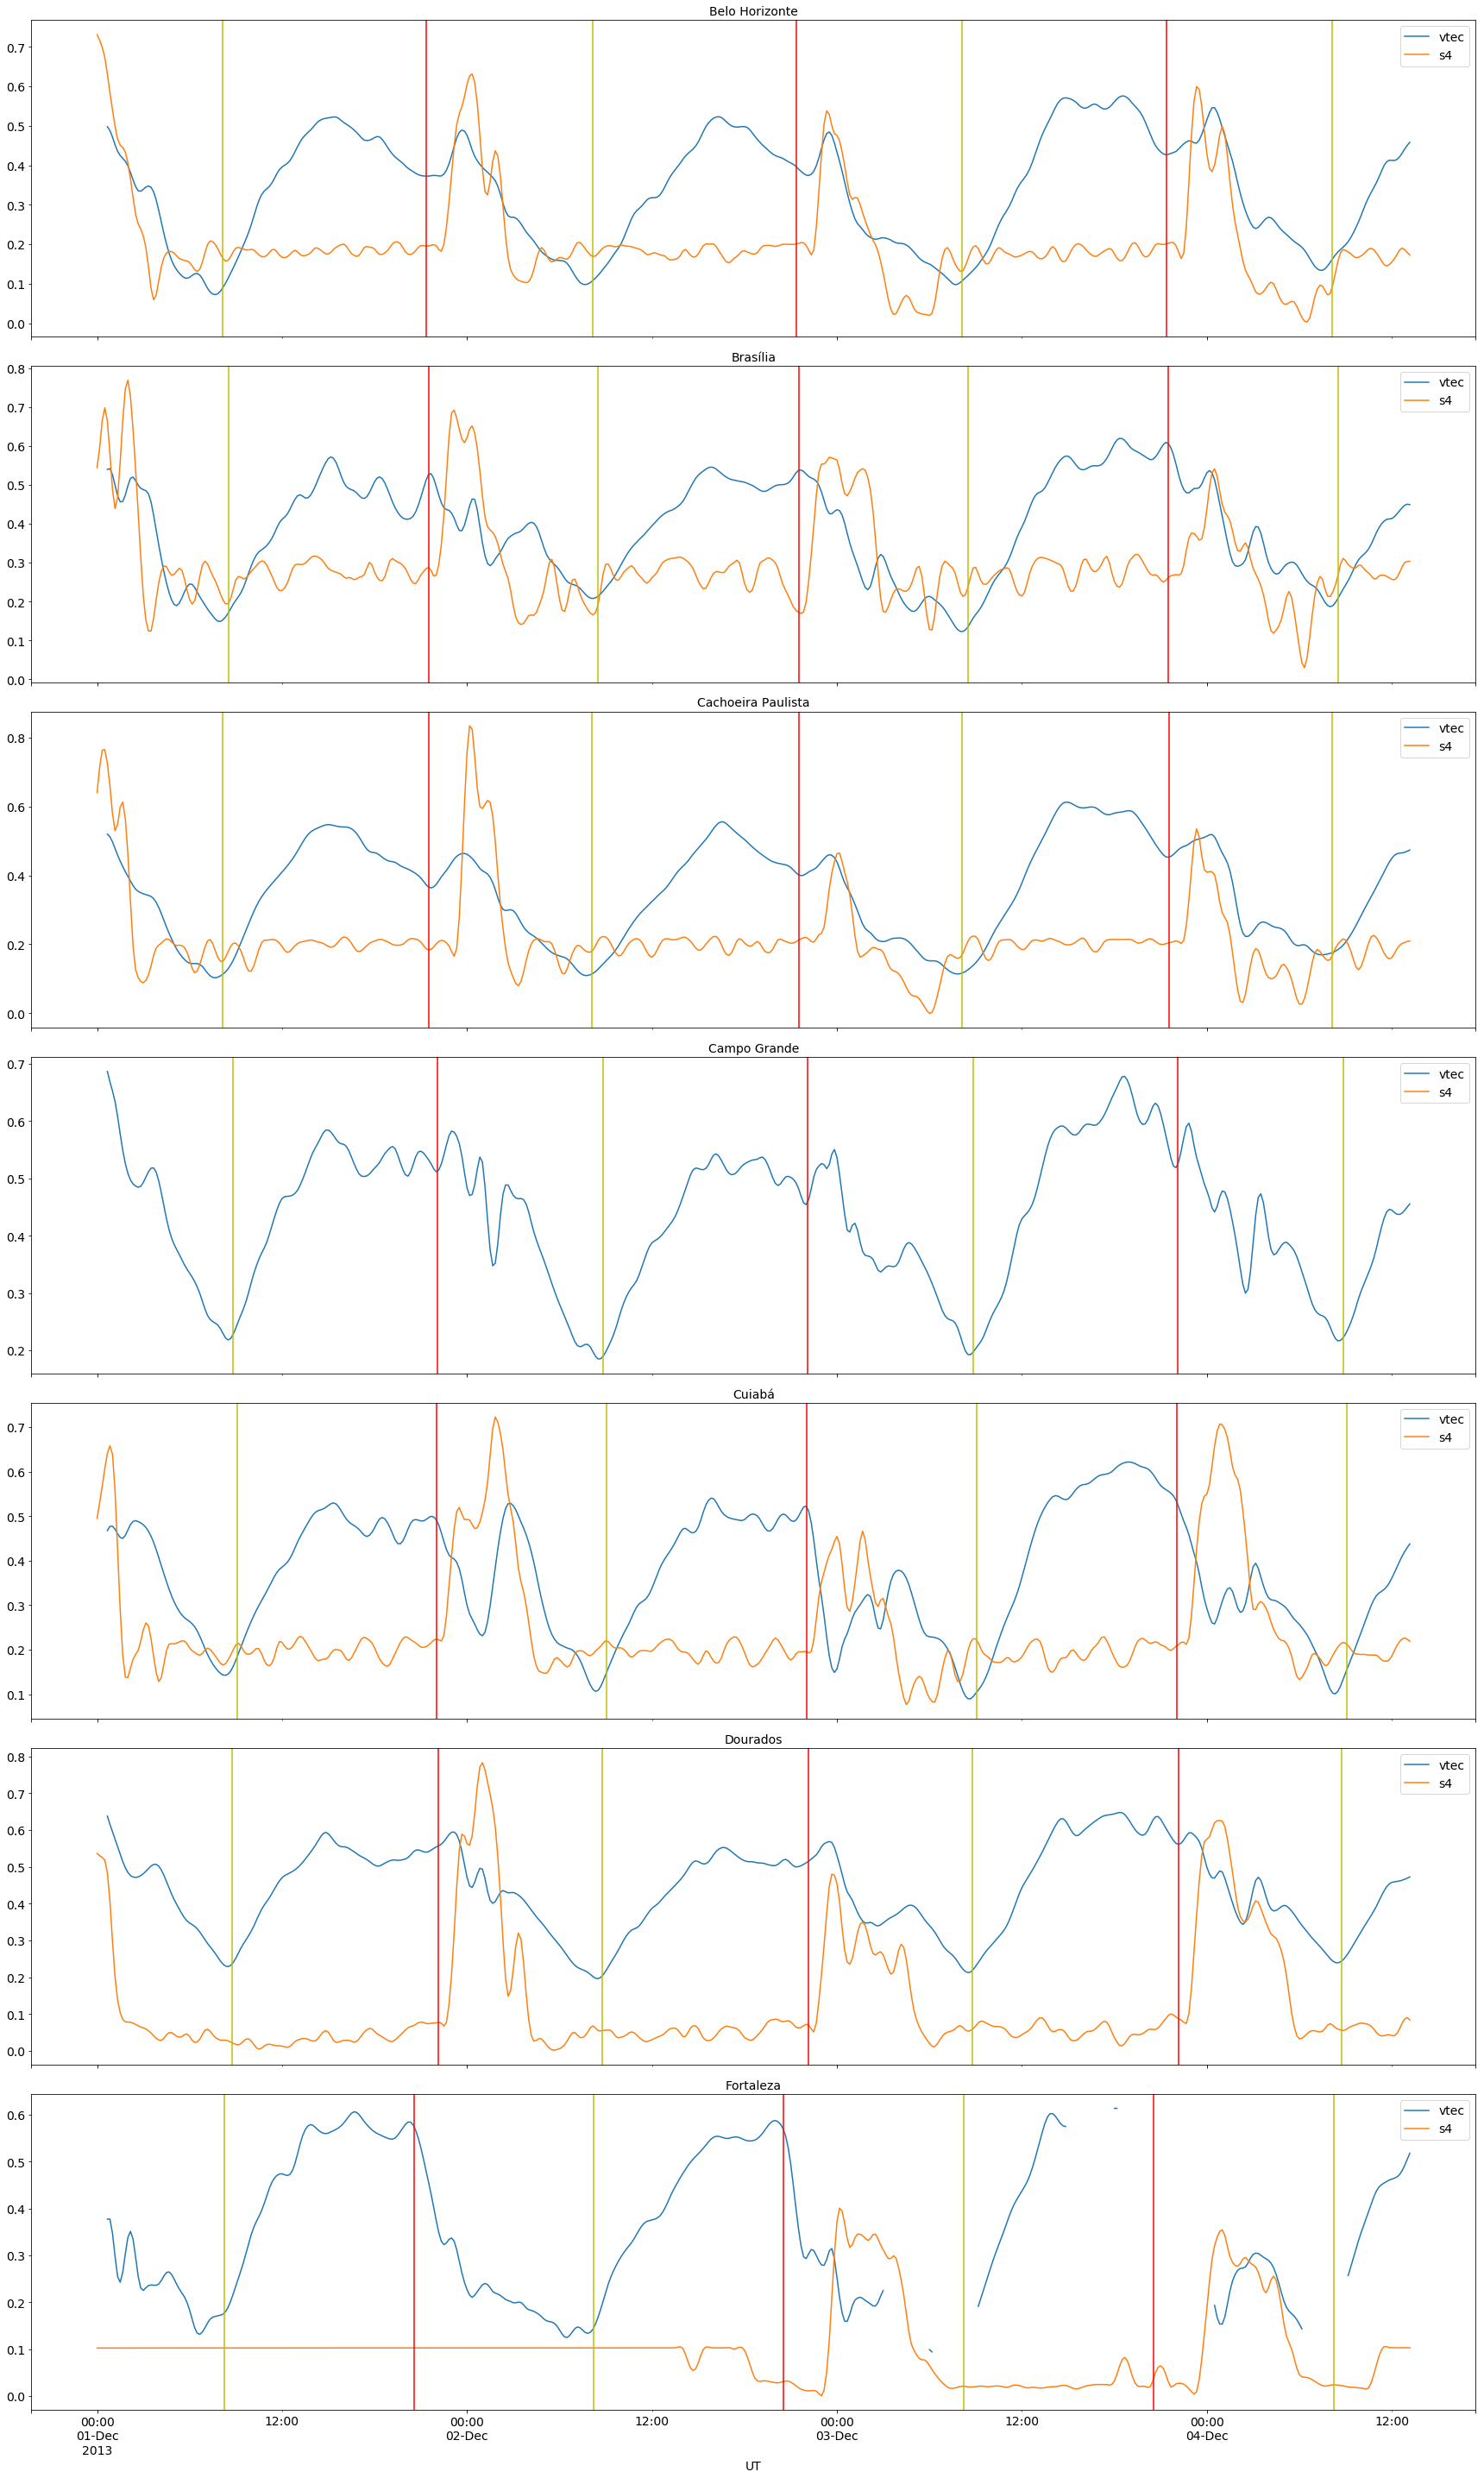

In [9]:
a = 0
b = 512

fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[0]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][a:b].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][a:b].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name, {'fontsize': latter_size})
    ax[idx].legend(loc="upper right")
    
    lat, long = location_station(i)
    set_of_sunrise = find_set_sunrise(df_series_vtec[i][a:b], lat, long)
    set_of_sunset = find_set_sunset(df_series_vtec[i][a:b], lat, long)
    for i in set_of_sunrise:
        ax[idx].axvline(x=i, color='y')
    for i in set_of_sunset[0:-1]:
        ax[idx].axvline(x=i, color='r')
    
plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/s4_vtec_sample0.eps', format='eps', dpi=1000)

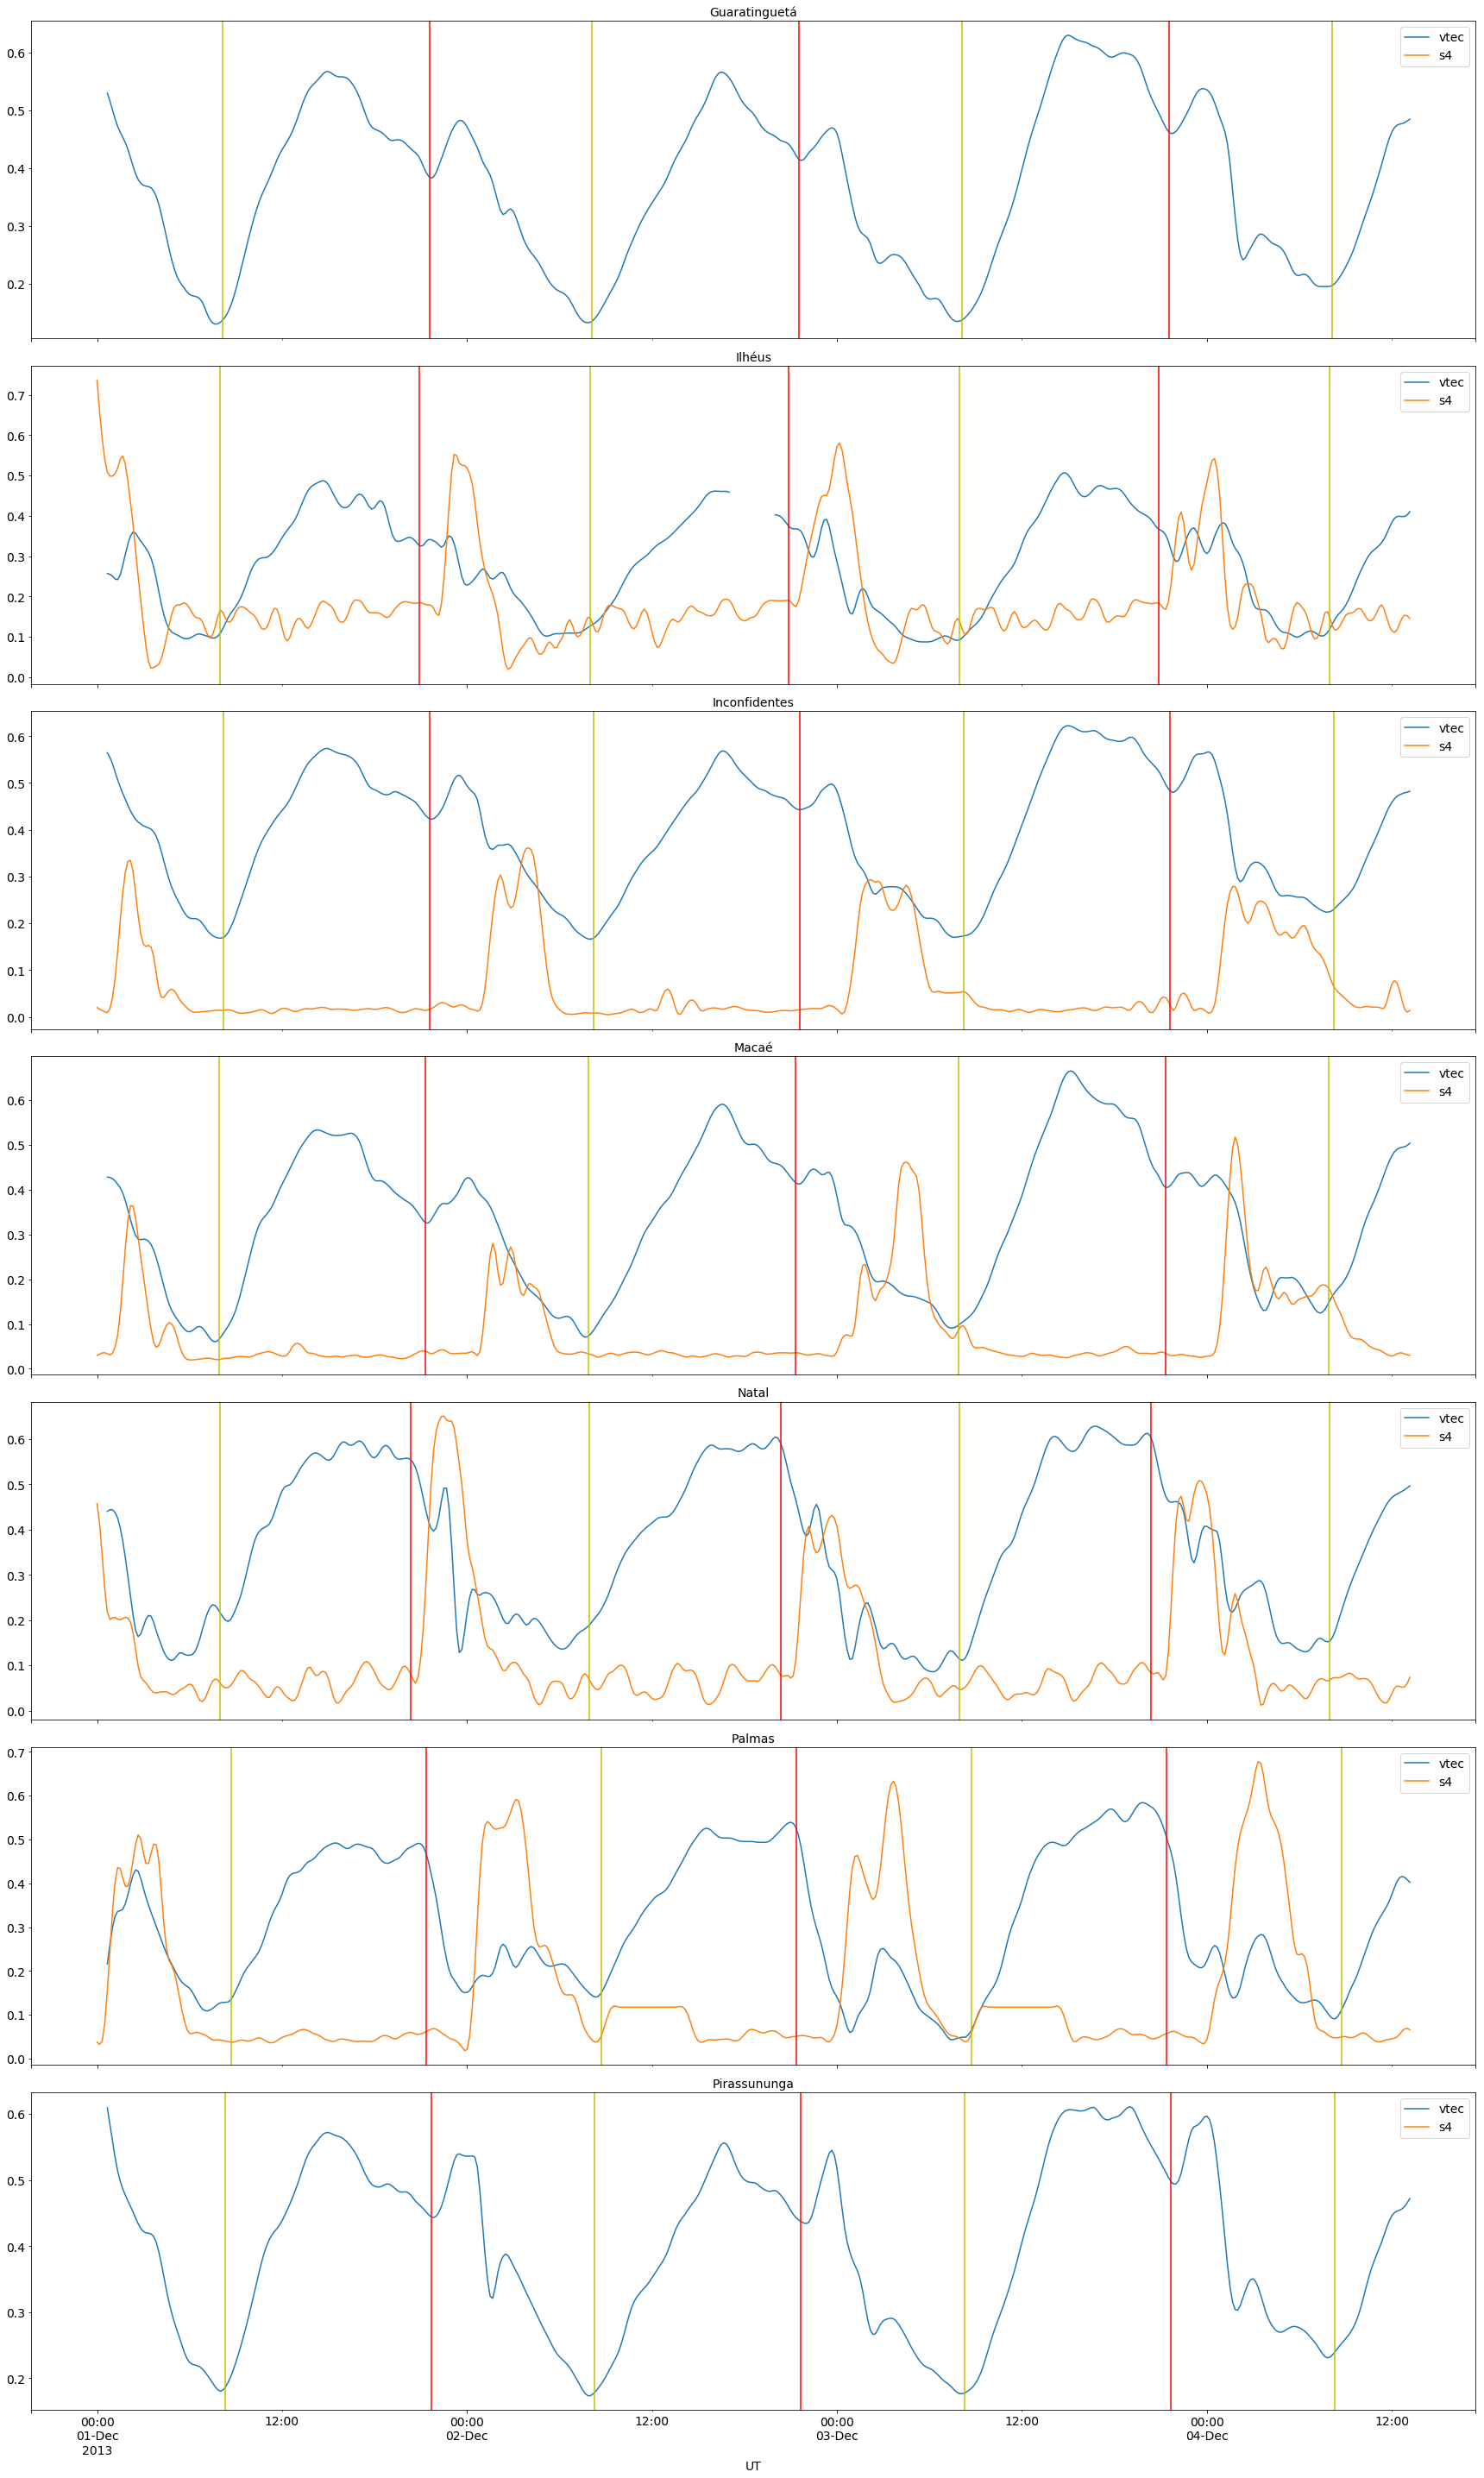

In [10]:
a = 0
b = 512

fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[1]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][a:b].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][a:b].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name, {'fontsize': latter_size})
    ax[idx].legend(loc="upper right")
    
    lat, long = location_station(i)
    set_of_sunrise = find_set_sunrise(df_series_vtec[i][a:b], lat, long)
    set_of_sunset = find_set_sunset(df_series_vtec[i][a:b], lat, long)
    for i in set_of_sunrise:
        ax[idx].axvline(x=i, color='y')
    for i in set_of_sunset[0:-1]:
        ax[idx].axvline(x=i, color='r')

plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/s4_vtec_sample1.eps', format='eps', dpi=1000)

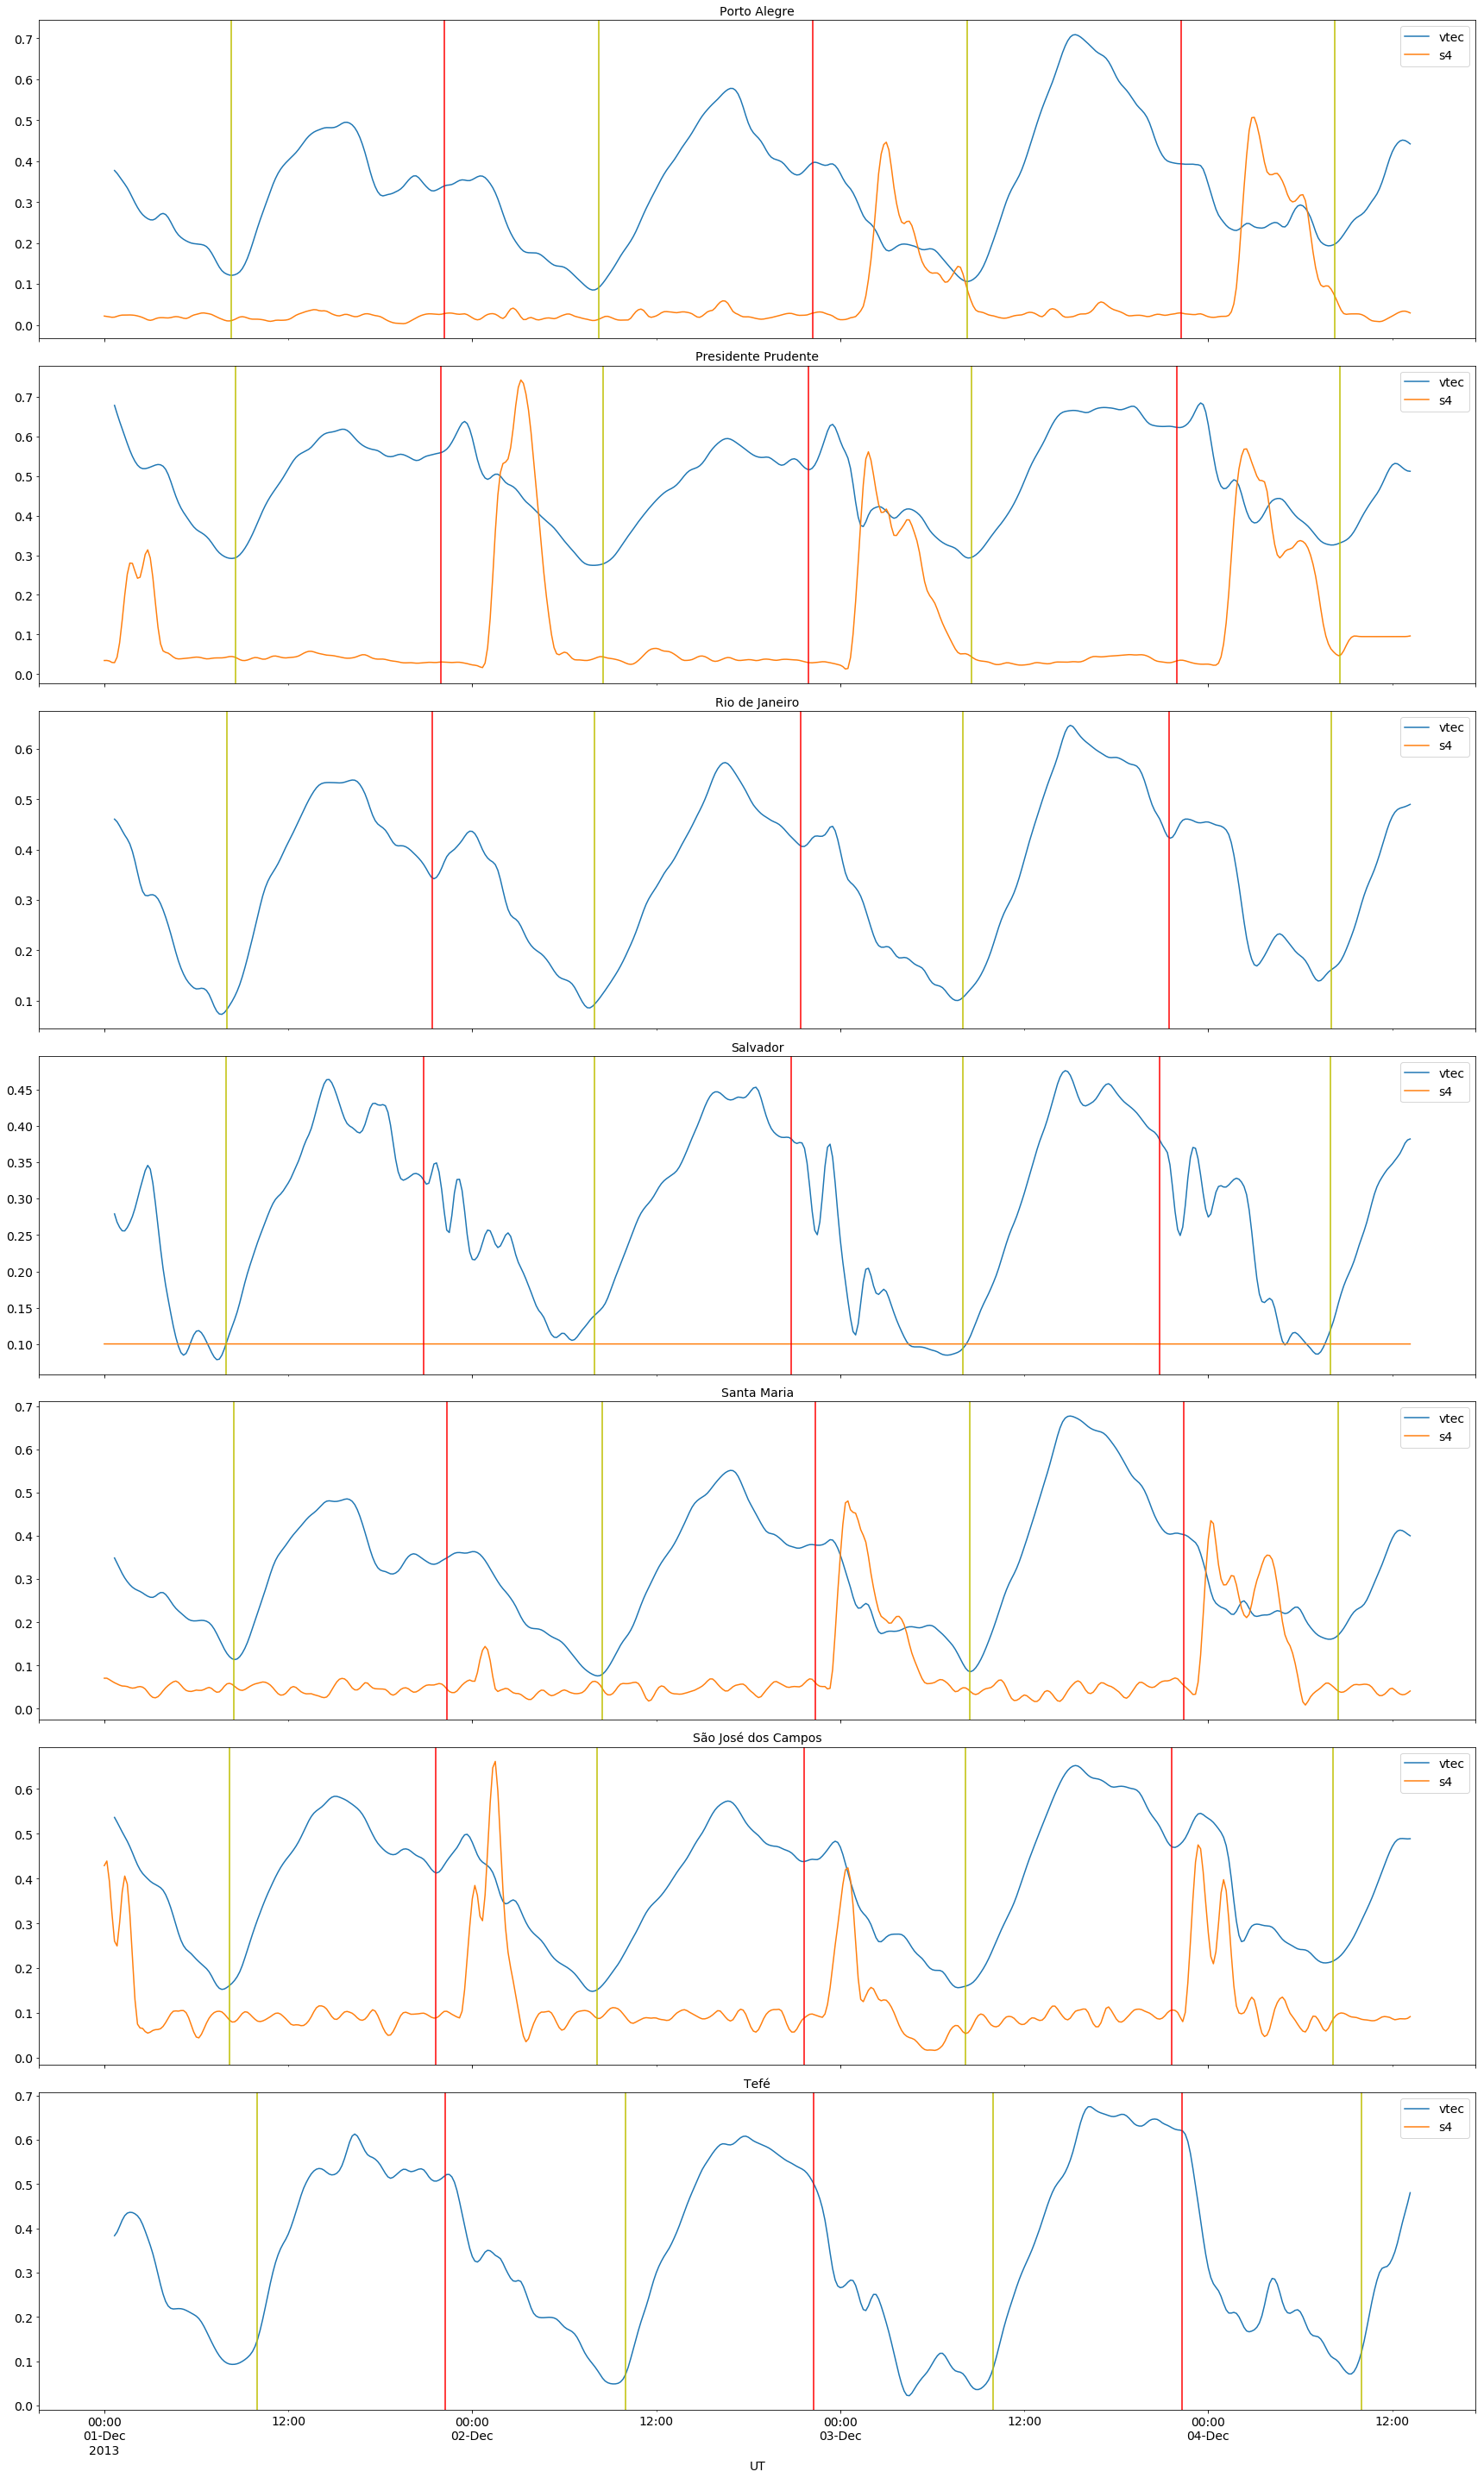

In [11]:
a = 0
b = 512

fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[2]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][a:b].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][a:b].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name, {'fontsize': latter_size})
    ax[idx].legend(loc="upper right")

    lat, long = location_station(i)
    set_of_sunrise = find_set_sunrise(df_series_vtec[i][a:b], lat, long)
    set_of_sunset = find_set_sunset(df_series_vtec[i][a:b], lat, long)
    for i in set_of_sunrise:
        ax[idx].axvline(x=i, color='y')
    for i in set_of_sunset[0:-1]:
        ax[idx].axvline(x=i, color='r')

plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/s4_vtec_sample2.eps', format='eps', dpi=1000)

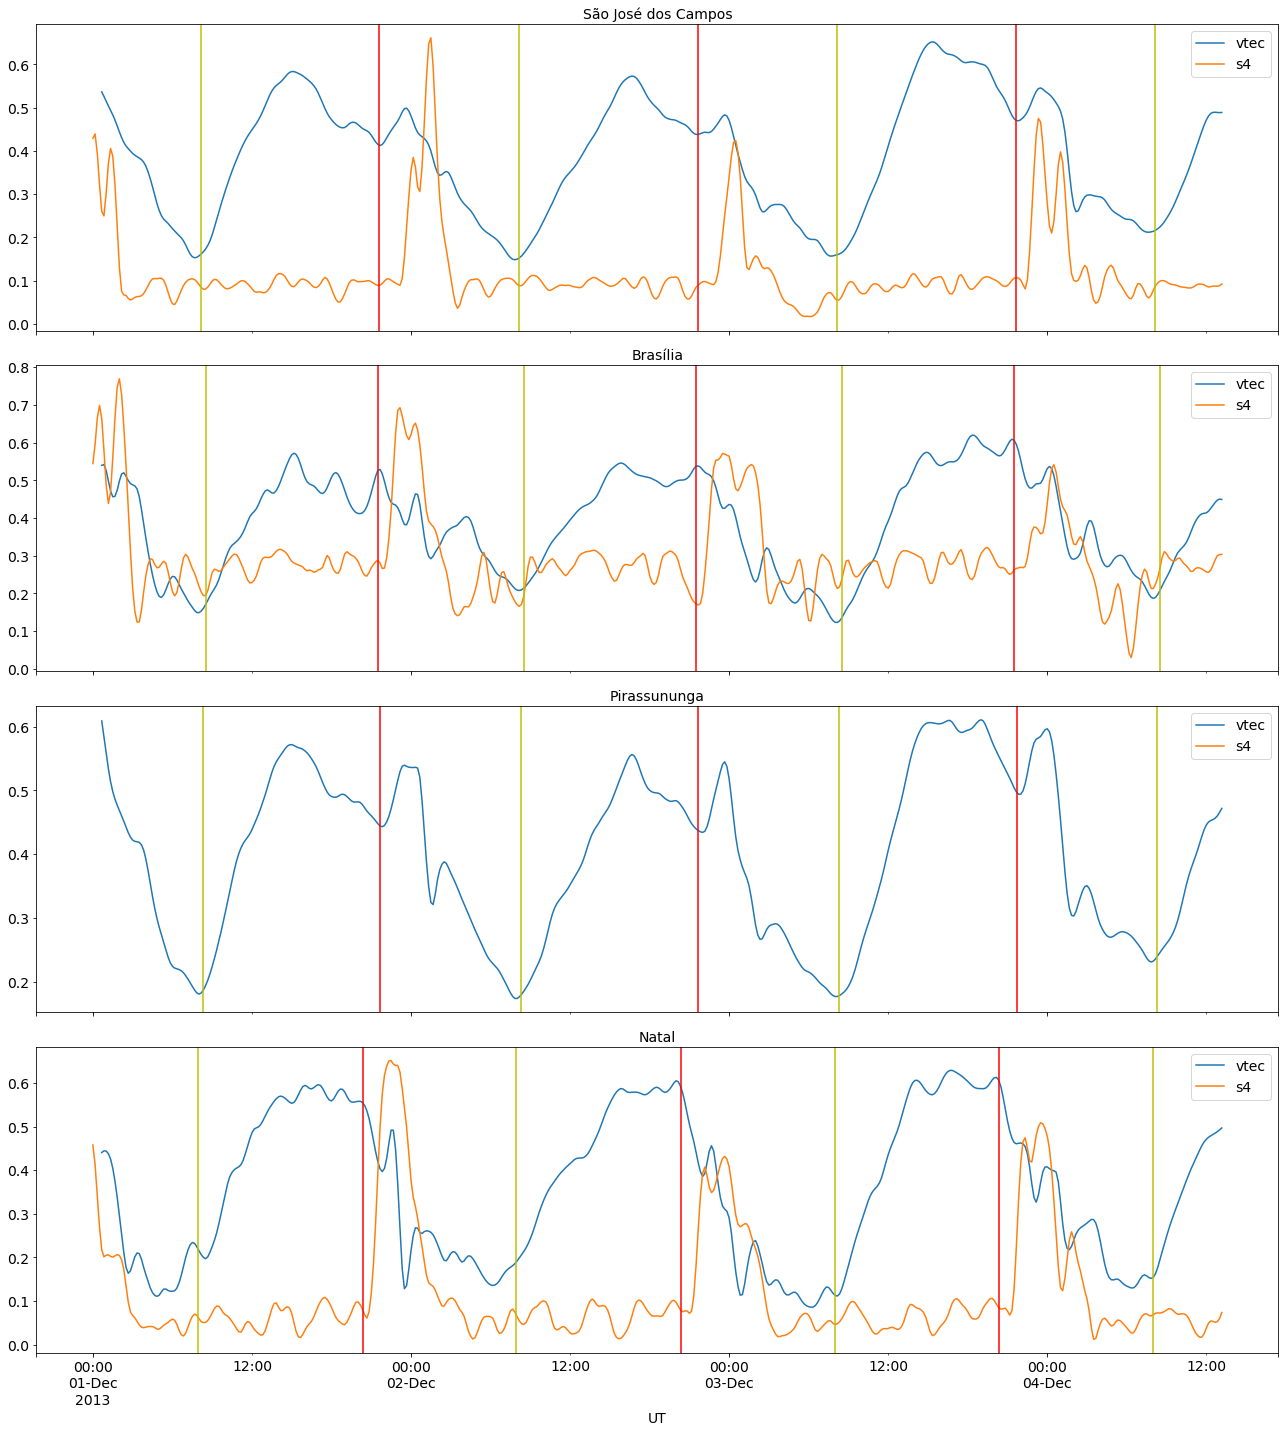

In [12]:
set_stations = ['sj2', 'bsa', '30', 'nta']

a = 0
b = 512

fig, ax = plt.subplots(len(set_stations), 1, sharex=True)
for idx, i in enumerate(set_stations):
    figsize = (18, 20)
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][a:b].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][a:b].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name, {'fontsize': latter_size})
    ax[idx].legend(loc="upper right")
    
    lat, long = location_station(i)
    set_of_sunrise = find_set_sunrise(df_series_vtec[i][a:b], lat, long)
    set_of_sunset = find_set_sunset(df_series_vtec[i][a:b], lat, long)
    for i in set_of_sunrise:
        ax[idx].axvline(x=i, color='y')
    for i in set_of_sunset[0:-1]:
        ax[idx].axvline(x=i, color='r')

plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/s4_vtec_sample.eps', format='eps', dpi=1000)

In [13]:
## Série completa

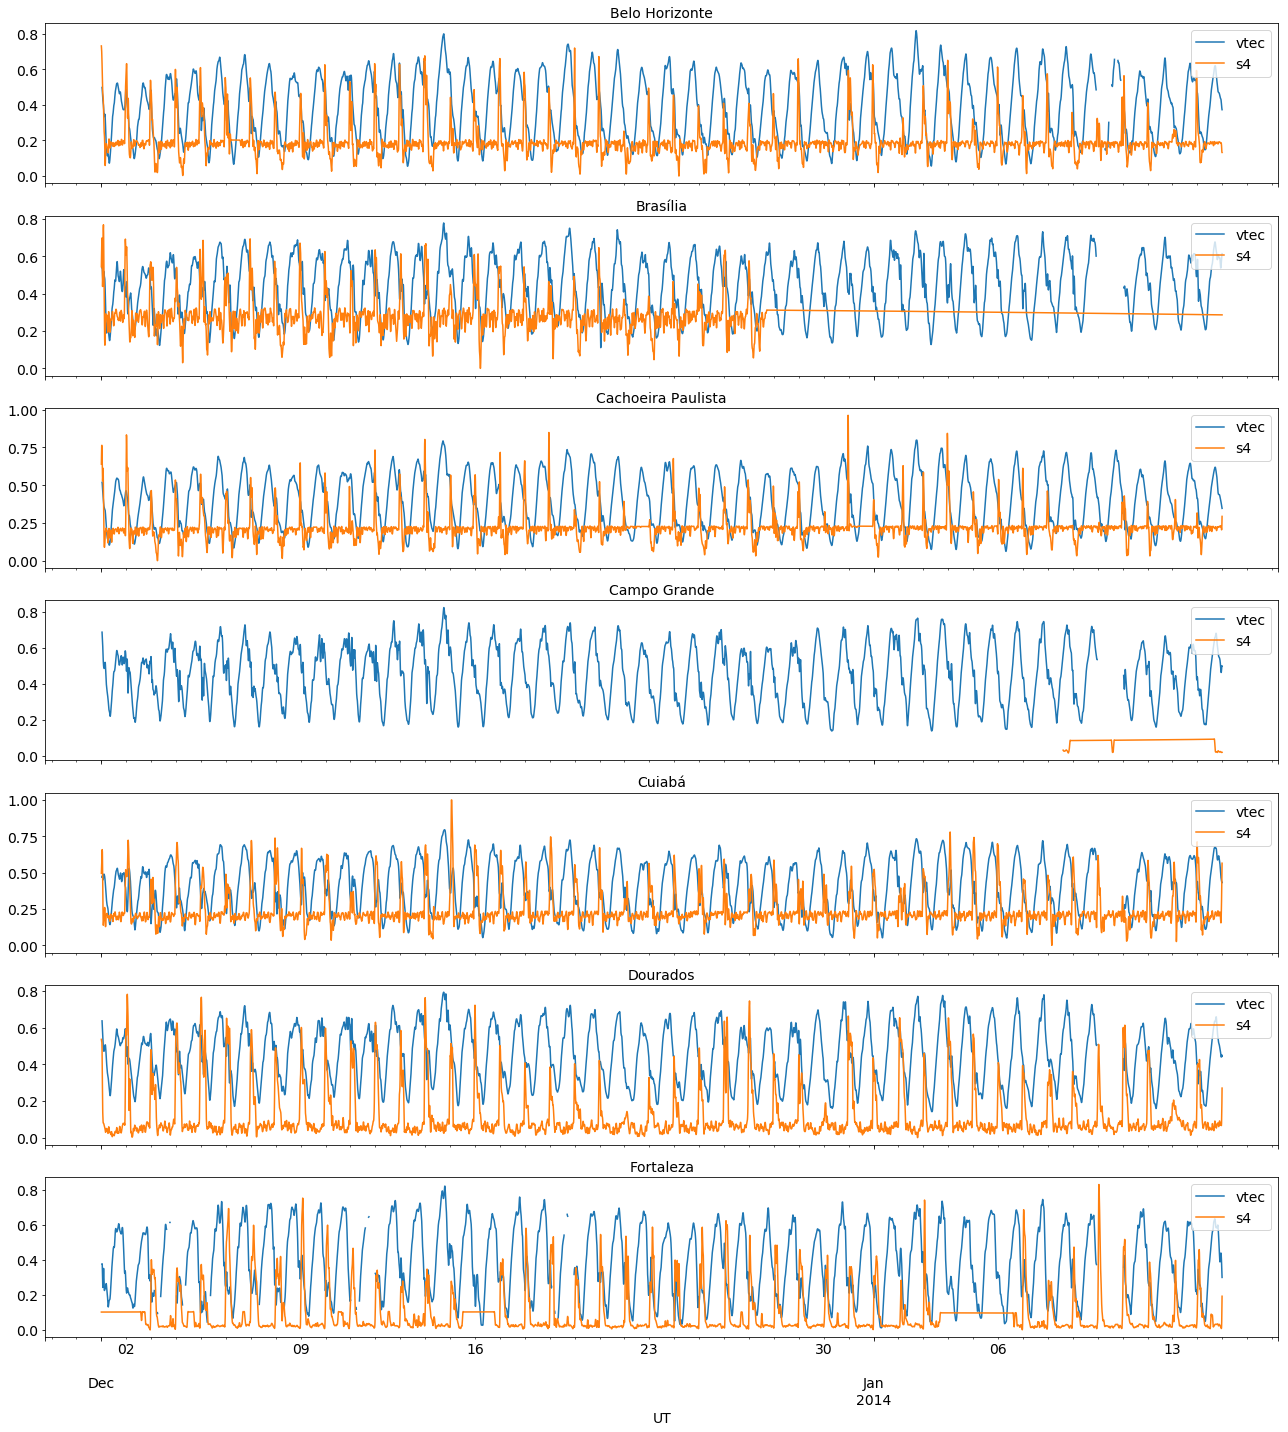

In [14]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[0]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:6480].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][0:6480].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name, {'fontsize': latter_size})
    ax[idx].legend(loc="upper right")

plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/s4_vtec_complete0.eps', format='eps', dpi=1000)

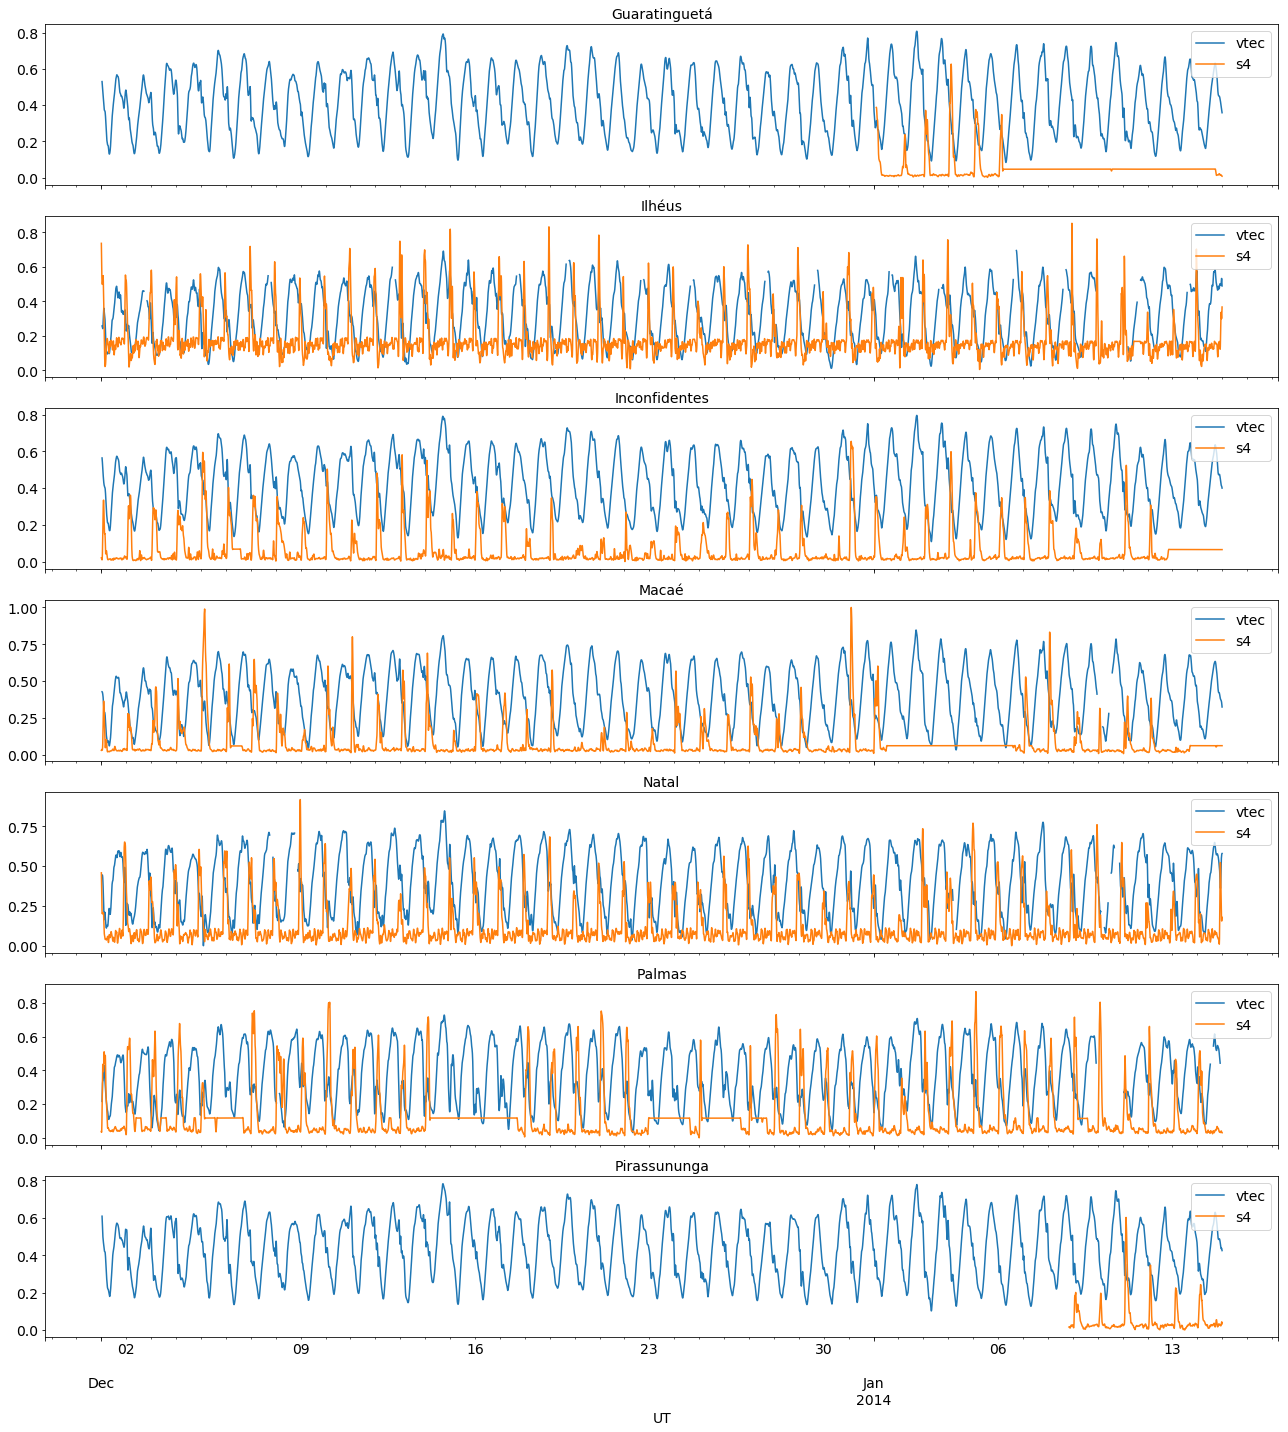

In [15]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[1]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:6480].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][0:6480].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name, {'fontsize': latter_size})
    ax[idx].legend(loc="upper right")
    
plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/s4_vtec_complete1.eps', format='eps', dpi=1000)

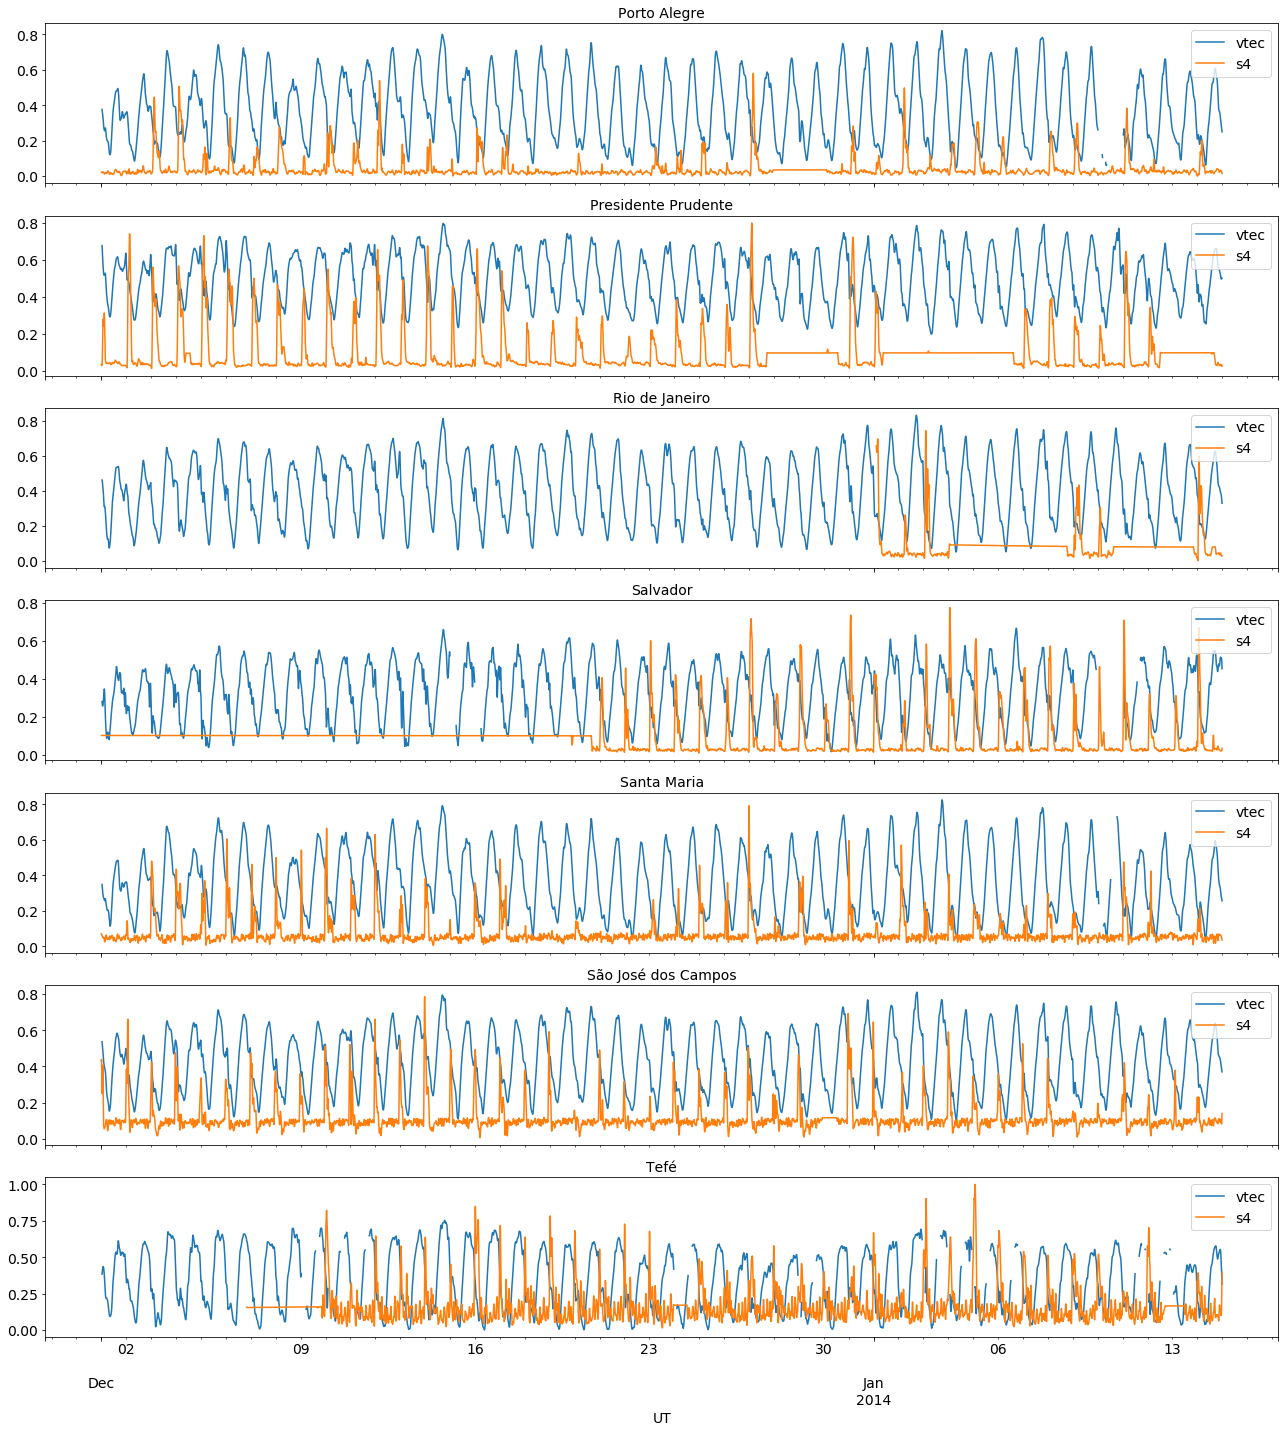

In [16]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[2]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:6480].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][0:6480].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name, {'fontsize': latter_size})
    ax[idx].legend(loc="upper right")

plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/s4_vtec_complete2.eps', format='eps', dpi=1000)    

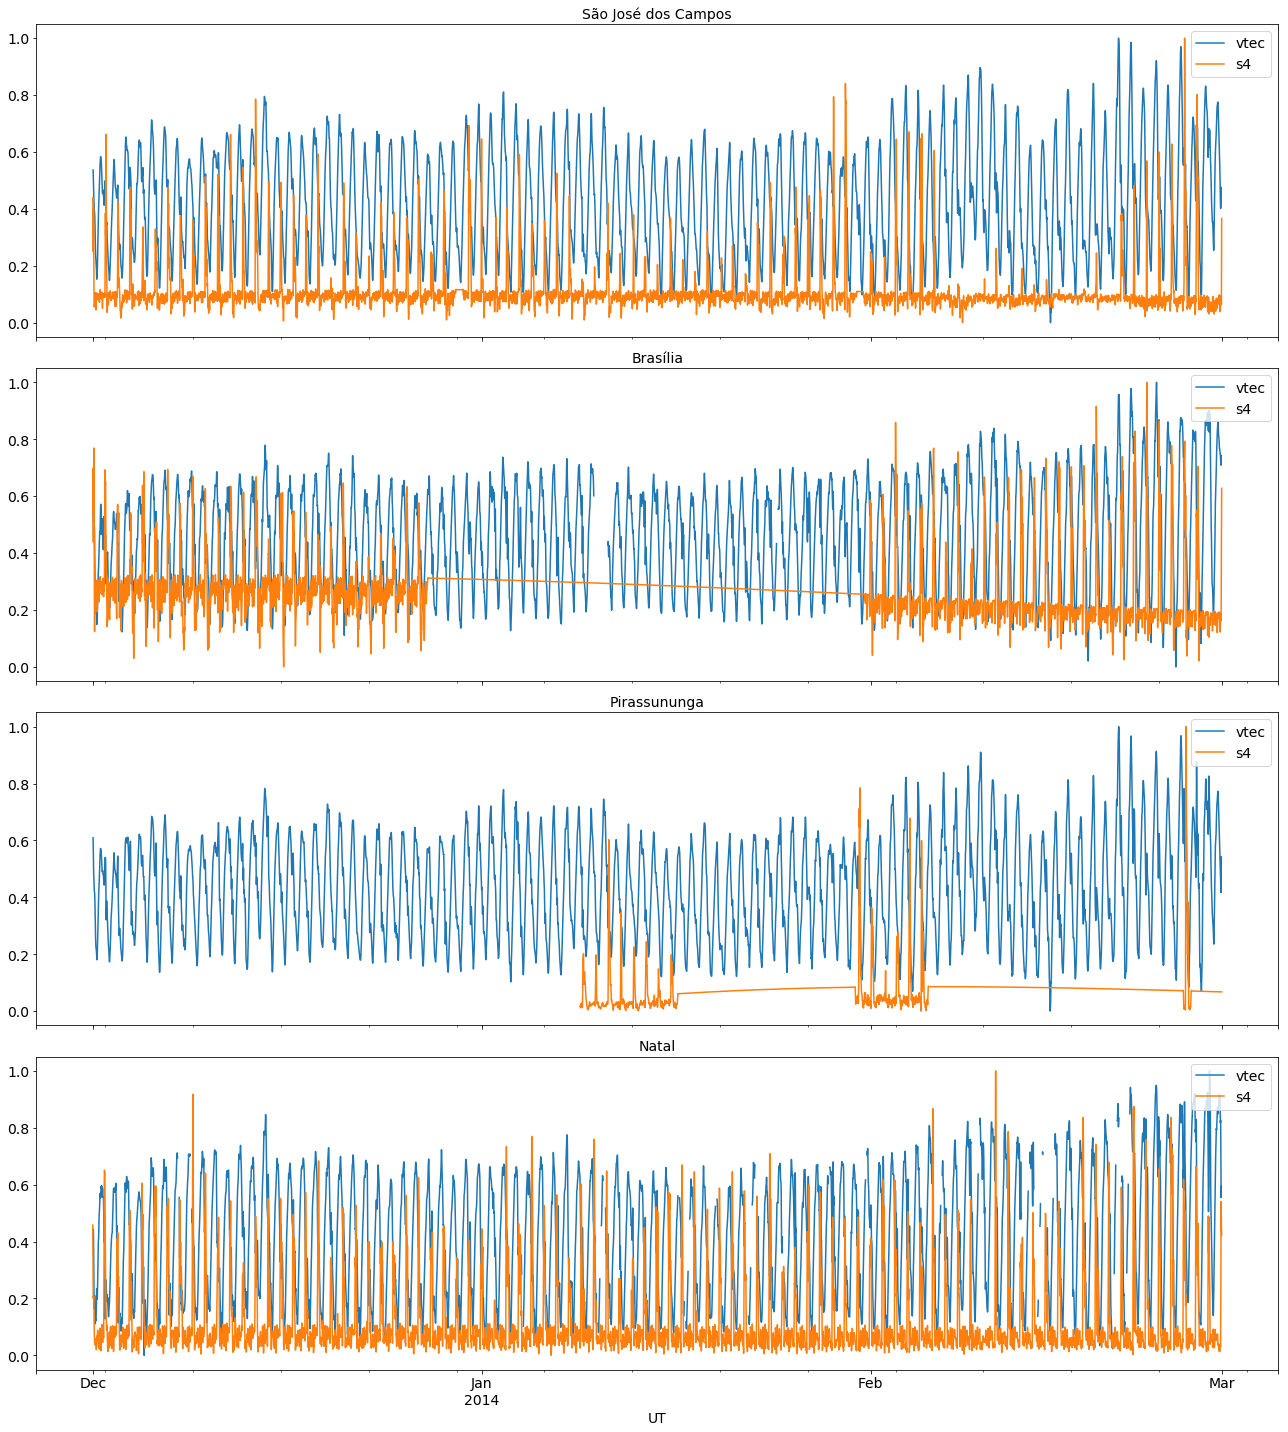

In [17]:
set_stations = ['sj2', 'bsa', '30', 'nta']

fig, ax = plt.subplots(len(set_stations), 1, sharex=True)
for idx, i in enumerate(set_stations):
    figsize = (18, 20)
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name, {'fontsize': latter_size})
    ax[idx].legend(loc="upper right")

plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/s4_vtec_complete.eps', format='eps', dpi=1000)